In [1]:
import sys; sys.path.insert(0, '../../'); sys.path.insert(0, '../mupClassification/');  sys.path.insert(0, '../off_beam_on_beam_5e19/'); sys.path.insert(0, '../axial_mass_from_run1_data/'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
from axial_mass_tools import *
import seaborn as sns;sns.set(style="white", color_codes=True ,font_scale=2);
%matplotlib inline

OffBeam_scaling: 1.24224698773 = N(on beam)/N(off beam) before sof. trig.
MC_scaling_DATAcosmic: 0.504451038576 = N(POT on beam)/N(POT MC)
MC_scaling_MCcosmic: 0.136225100235 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Figures/Janet28Questions/'

In [29]:
GENIEall = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/genie/prodgenie_bnb_nu_uboone_overlay_mcc8_reco2_genie.csv')
GENIE_CC1p0pi = GENIEall[GENIEall['IsCC_1p_200MeVc_0pi']==1]
GENIE_CC1p0pi_reconstructed = GENIE_CC1p0pi[GENIE_CC1p0pi['IsVertexReconstructed']==1]

In [6]:
Afro_genie_sample = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/mA/genie_files/Zarko_argon40_numu_mA_0_99.csv')
CC1p0pi_Afro_genie_sample = Afro_genie_sample[Afro_genie_sample['CC1p0pi']==True]
print 'len(CC1p0pi):',len(CC1p0pi_Afro_genie_sample)

len(CC1p0pi): 26622


In [2]:
GENIE_AdiOverlay = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/genie/Adi_new_overlay_small_genie.csv')
print len(GENIE_AdiOverlay),'interactions pairs in GENIE'
CC_Np_200MeVc = GENIE_AdiOverlay[(GENIE_AdiOverlay['IsCC_Np_200MeVc']==True)]
CC_Np_200MeVc_contained = CC_Np_200MeVc[(CC_Np_200MeVc['IsVertexContained']==True)]
CC_Np_200MeVc_mu_reco = CC_Np_200MeVc_contained[(CC_Np_200MeVc_contained['Is_mu_TrackReconstructed']==True)]
CC_Np_200MeVc_mu_recoInFV = CC_Np_200MeVc_mu_reco[(CC_Np_200MeVc_mu_reco['Is_mu_TrackInFV']==True)]
CC_Np_200MeVc_vertex_recoInFV = CC_Np_200MeVc_mu_recoInFV[(CC_Np_200MeVc_mu_recoInFV['IsVertexReconstructed']==True)&(CC_Np_200MeVc_mu_recoInFV['IsVertexInFV']==True)]
print "len(CC_Np_200MeVc_vertex_recoInFV):",len(CC_Np_200MeVc_vertex_recoInFV)

10035 interactions pairs in GENIE
len(CC_Np_200MeVc_vertex_recoInFV): 815


# 5.II.1Questions that are relevant for our analyses
 1. The solid angle of the detector is 5 mrads. Do we correct for this rotation in the simulation in order to match data? In fact, we need to think about beam width and parallax, because a neutrino with a 400 m travel distance actually has an opening angle of 6.25 mrads. Note that this will be flavor dependent. A consequence of not getting this right is that your muon angle distribution in the xsecs will be wrong. It also affects any analysis looking for transverse momentum or


# 1.II.1 Beam rotation, width, parallax

			The solid angle of the detector is 5 mrads.
			Do we correct for this rotation in the simulation in order to match data?
			In fact, we need to think about beam width and parallax, because a neutrino with a 400 m travel distance actually has an opening angle of 6.25 mrads.
			Note that this will be flavor dependent. A consequence of not getting this right is that your muon angle distribution in the xsecs will be wrong.
			It also affects any analysis looking for transverse momentum or

## Zarko:
I think to address first question one can make few sanity checks. Plot the angle of neutrino interacting in detector, plot the z and r distributions of neutrino origins in decay pipe. And then various x, y, z distributions of interaction points in detector. I believe this question is coming from Janet's experience with MiniBooNE where all neutrino interactions were pulled from 1d neutrino spectrum histogram. One would then go back to beam ntuple and find the neutrino closest in energy. That would then determine neutrino angle and position where it interacts in detector. You could imagine various things going wrong with this procedure and the need to cross check all the distributions.
On MicroBooNE this is done differently. You loop through the beam ntuple from the beginning and checking each ray if it crosses detector and creates interaction. So you are sampling the actual neutrino rays from the beginning. Anyway, if various distributions mentioned above look reasonable that would be convincing enough for me that everything works fine. Also for each event you have neutrino origin (x,y,z) in beam coordinate system and interaction point (vx,vy,vz) in detector system. You could make sure
$$x+px/pz*(vz-z+470m)=vx-1.3 $$
$$y+py/pz*(vz-z+470m)=vy $$

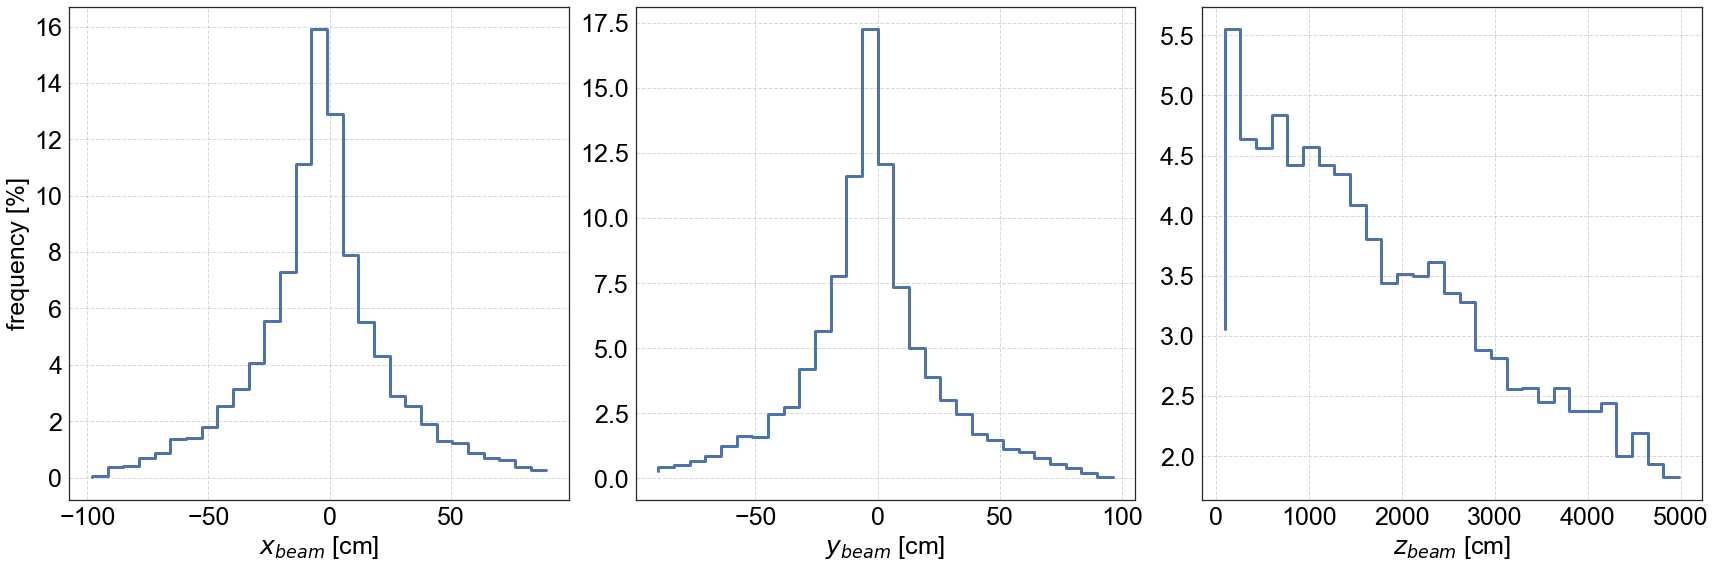

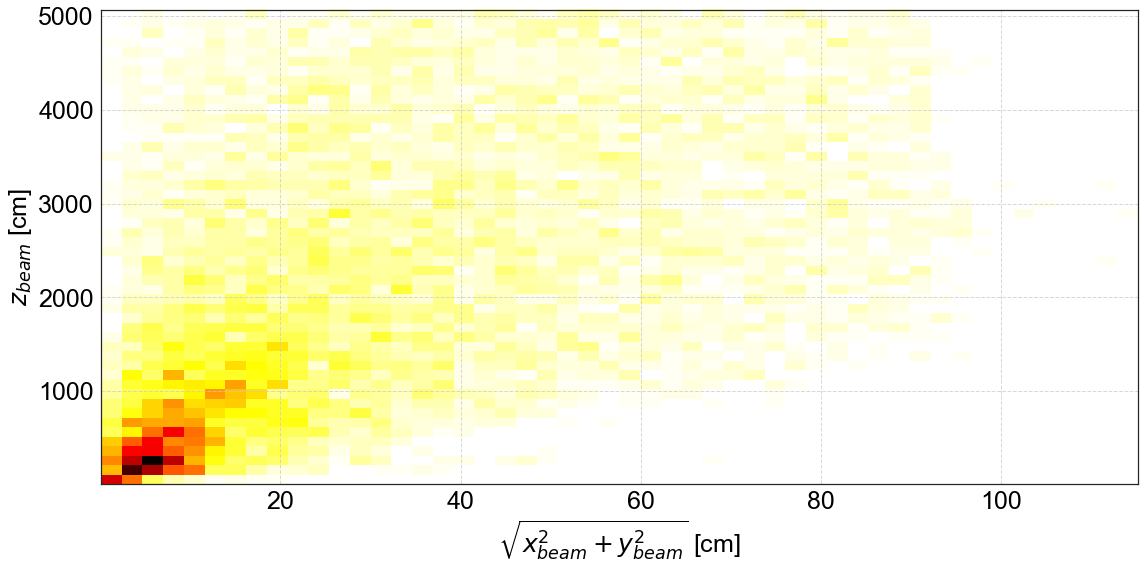

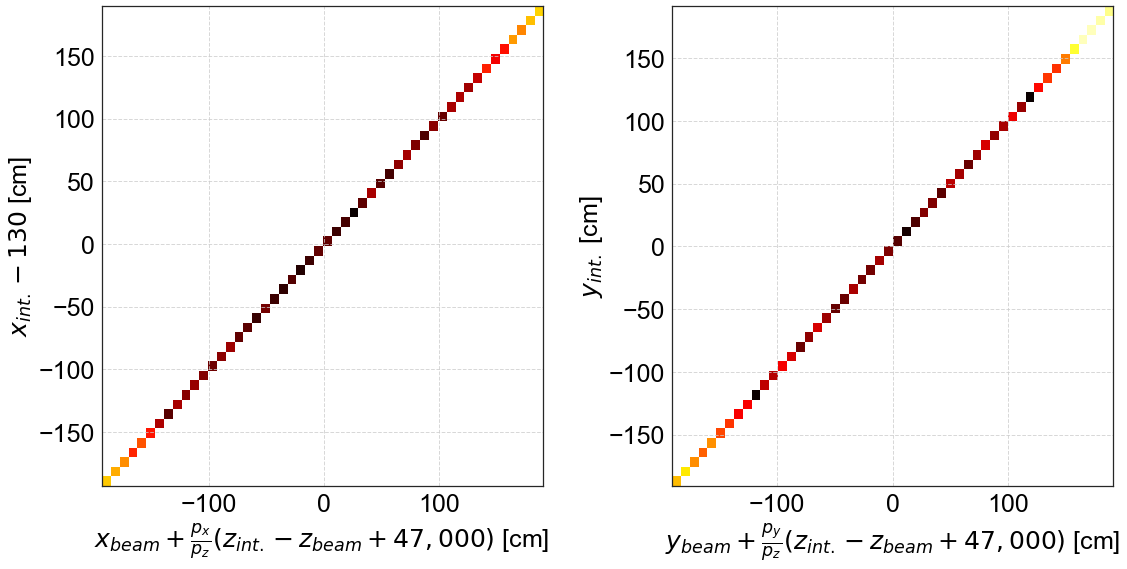

In [5]:
# GENIE_AdiOverlay['truth_x']
# interaction point
vx = GENIE_AdiOverlay['truth_x']
vy = GENIE_AdiOverlay['truth_y']
vz = GENIE_AdiOverlay['truth_z']
# beam coordinate system
x = GENIE_AdiOverlay['truth_x_beamCoordinates']
y = GENIE_AdiOverlay['truth_y_beamCoordinates']
z = GENIE_AdiOverlay['truth_z_beamCoordinates']
# momentum
px = GENIE_AdiOverlay['truth_Pv_x']
py = GENIE_AdiOverlay['truth_Pv_y']
pz = GENIE_AdiOverlay['truth_Pv_z']

# beam coordinates
fig=plt.figure(figsize=(24,8))
for i_dir,(dir,dir_name) in enumerate(zip([x,y,z]
                                        ,['x','y','z'])):
    ax=fig.add_subplot(1,3,i_dir+1)
    h,bins = np.histogram( dir , bins=30); mid=0.5*(bins[:-1]+bins[1:])
    h = 100.0*h/np.sum(h)
    plt.step(mid,h,linewidth=3)
    set_axes(ax,r'$'+dir_name+'_{beam}$ [cm]'
             ,r'frequency [%]' if i_dir==0 else ''
             ,do_add_grid=True)
plt.tight_layout()
plt.savefig(figures_path+'beam_coordinates.pdf')

# 2D of beam transverse vs. longitudinal
fig,ax=plt.subplots(figsize=(16,8))
plot_2d_hist( np.sqrt(np.square(x)+np.square(y)) , z , ax=ax);
set_axes(ax,r'$\sqrt{x_{beam}^2 + y_{beam}^2}$ [cm]',r'$z_{beam}$ [cm]',do_add_grid=True)
plt.tight_layout()
plt.savefig(figures_path+'beam_transverse_longitudinal.pdf')

# parallax spread from the horn
fig=plt.figure(figsize=(16,8))
ax=fig.add_subplot(1,2,1)
plot_2d_hist( x + (px/pz)*(vz-z+47000.) , vx-130 , ax=ax);
set_axes(ax,r'$x_{beam} + \frac{p_x}{p_z}(z_{int.}-z_{beam}+47,000)$ [cm]',r'$x_{int.} - 130$ [cm]',do_add_grid=True)

ax=fig.add_subplot(1,2,2)
plot_2d_hist( y + (py/pz)*(vz-z+47000.) , vy, ax=ax);
set_axes(ax,r'$y_{beam} + \frac{p_y}{p_z}(z_{int.}-z_{beam}+47,000)$ [cm]',r'$y_{int.}$ [cm]',do_add_grid=True)

plt.tight_layout()
plt.savefig(figures_path+'horn_spread.pdf')

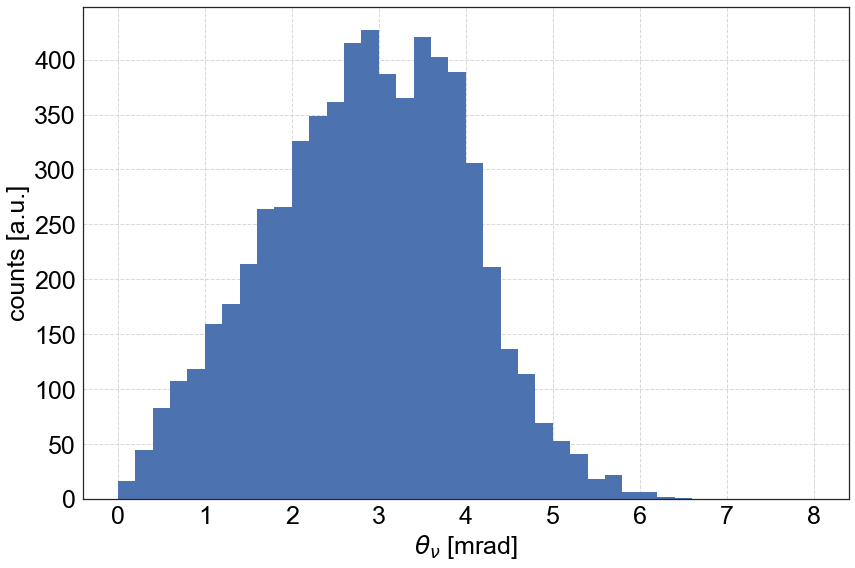

In [33]:
# fig,ax=plt.subplots(figsize=(12,8))
# plt.scatter(CC_Np_200MeVc_vertex_recoInFV['truth_Pv_x'],CC_Np_200MeVc_vertex_recoInFV['truth_Pv_y'],s=30);
# set_axes(ax,r'$p_\nu^x$ [GeV/c]',r'$p_\nu^y$ [GeV/c]'
#          ,xticks=[-0.005,0,0.005],xlim=(-0.006,0.006),yticks=[-0.005,0,0.005],ylim=(-0.006,0.006),do_add_grid=True)
# plt.tight_layout()
# plt.savefig(figures_path+'q5_Pvx_vs_Pvy.pdf')

fig,ax=plt.subplots(figsize=(12,8))
# GENIEall['Pv_theta'] = np.arccos(GENIEall['Pv_z']/GENIEall['Ev'])
# CC1p0pi_Afro_genie_sample['Pv_theta'] = np.arccos(CC1p0pi_Afro_genie_sample['Pv_z']/CC1p0pi_Afro_genie_sample['Ev'])
# theta = Afro_genie_sample['Pv_theta']
# plt.hist(1000*theta,bins=np.linspace(0,20,41));
# plt.hist(1000*np.arccos(Afro_genie_sample['Pv_z']/Afro_genie_sample['Ev']),bins=np.linspace(0,20,41));
theta = CC_Np_200MeVc['truth_Pv_theta']
plt.hist(1000*theta,bins=np.linspace(0,8,41));

set_axes(ax,r'$\theta_\nu$ [mrad]',r'counts [a.u.]'
#          ,xticks=[-0.005,0,0.005],xlim=(-0.006,0.006)
         ,do_add_grid=True)
plt.tight_layout()
plt.savefig(figures_path+'q5_Pv_theta.pdf')

# Compare GENIE from Afro to GENIE from overlay

In [22]:
def compare_genie_adi_afro(var = 'Ev',x_label = r'$E_\nu$ [GeV]',bins = np.linspace(0,6,100),do_add_legend=True):
    fig,ax=plt.subplots(figsize=(8,6))
    plt.hist(GENIE_AdiOverlay['truth_'+var],bins=bins,label='Adi (overlay) GENIE',histtype='step',linewidth=3,normed=1);
    plt.hist(Afro_genie_sample[var],bins=bins,label='Afro GENIE',histtype='step',linewidth=3,normed=1);
    set_axes(ax,x_label,do_add_legend=do_add_legend)

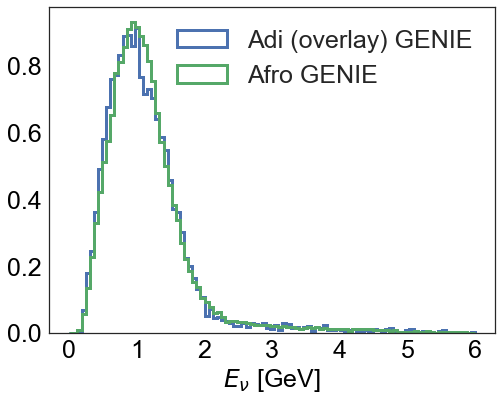

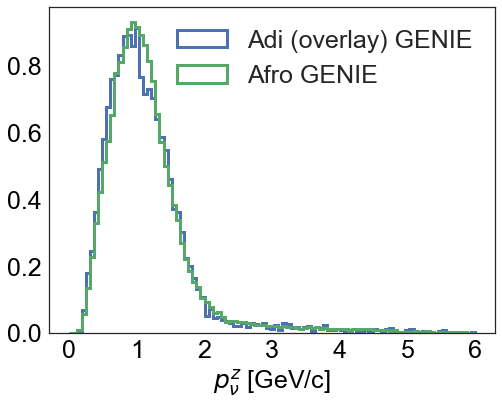

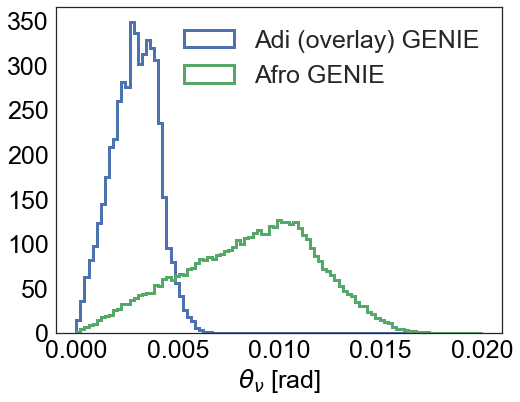

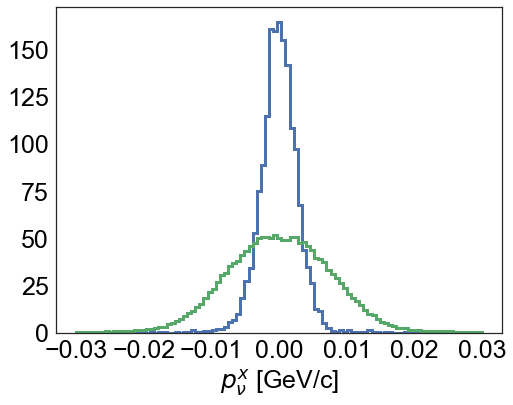

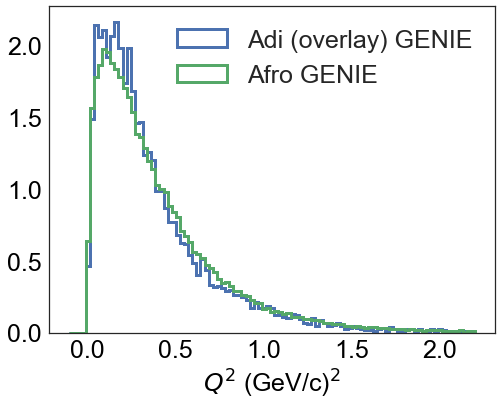

In [29]:
compare_genie_adi_afro(var = 'Ev',x_label = r'$E_\nu$ [GeV]',bins = np.linspace(0,6,100))
compare_genie_adi_afro(var = 'Pv_z',x_label = r'$p_\nu^z$ [GeV/c]',bins = np.linspace(0,6,100))
compare_genie_adi_afro(var = 'Pv_theta',x_label = r'$\theta_\nu$ [rad]',bins = np.linspace(0,0.02,100))
compare_genie_adi_afro(var = 'Pv_x',x_label = r'$p_\nu^x$ [GeV/c]',bins = np.linspace(-0.03,0.03,100),do_add_legend=False)
compare_genie_adi_afro(var = 'Q2',x_label = r'$Q^2$ (GeV/c)$^2$',bins = np.linspace(-0.1,2.2,100))

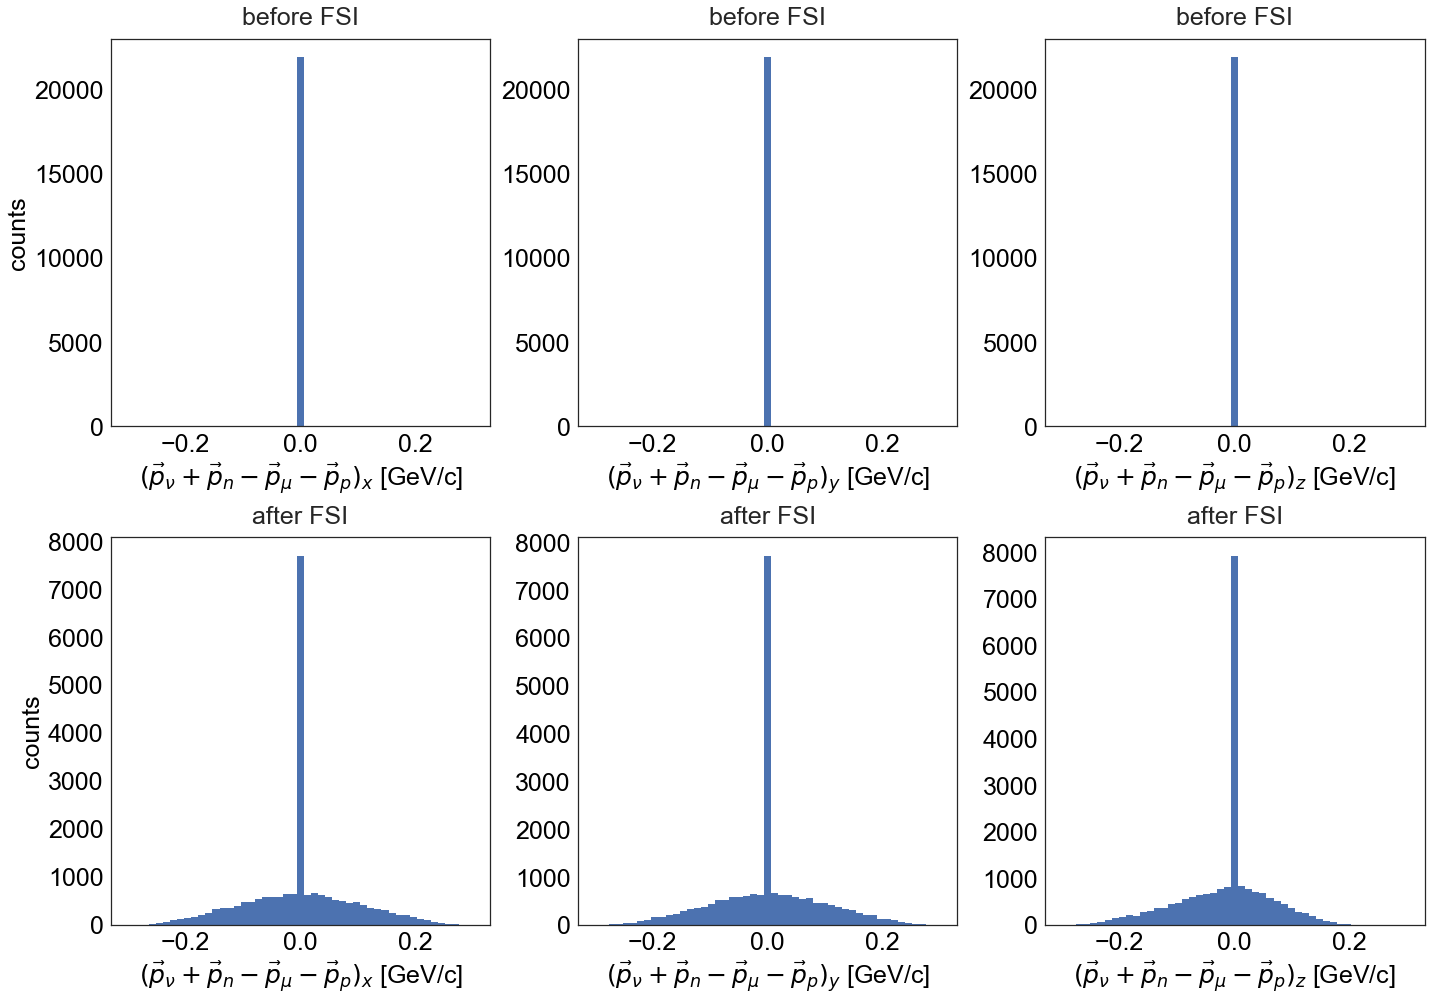

In [22]:
fig=plt.figure(figsize=(20,14))
for i_dir,direction in enumerate(['x','y','z']):
    
    ax=fig.add_subplot(2,3,i_dir+1)
    P_nu_n = CC1p0pi_Afro_genie_sample['p'+direction+'v']+CC1p0pi_Afro_genie_sample['p'+direction+'n']
    P_mu_p = CC1p0pi_Afro_genie_sample['Pmu_'+direction]+CC1p0pi_Afro_genie_sample['Pp_before_FSI_'+direction]
    plt.hist( P_nu_n-P_mu_p, bins=np.linspace(-0.3,0.3,50))
    set_axes(ax
             ,r'$(\vec{p}_\nu+\vec{p}_n - \vec{p}_\mu - \vec{p}_p)_{'+direction+'}$ [GeV/c]'
             ,'counts' if i_dir==0 else ''
             ,title='before FSI'
            )

    ax=fig.add_subplot(2,3,i_dir+1+3)
    P_nu_n = CC1p0pi_Afro_genie_sample['p'+direction+'v']+CC1p0pi_Afro_genie_sample['p'+direction+'n']
    P_mu_p = CC1p0pi_Afro_genie_sample['Pmu_'+direction]+CC1p0pi_Afro_genie_sample['Pp_'+direction]
    plt.hist( P_nu_n-P_mu_p, bins=np.linspace(-0.3,0.3,50))
    set_axes(ax
             ,r'$(\vec{p}_\nu+\vec{p}_n - \vec{p}_\mu - \vec{p}_p)_{'+direction+'}$ [GeV/c]'
             ,'counts' if i_dir==0 else ''
             ,title='after FSI')
    
# ax=fig.add_subplot(2,4,4)
# CC1p0pi_Afro_genie_sample['En'] = np.sqrt( np.square(0.9395654) 
#                                           + np.square(CC1p0pi_Afro_genie_sample['pxn'])
#                                           + np.square(CC1p0pi_Afro_genie_sample['pyn'])
#                                           + np.square(CC1p0pi_Afro_genie_sample['pzn']) )
# E_nu_n = CC1p0pi_Afro_genie_sample['Ev']+CC1p0pi_Afro_genie_sample['En']
# CC1p0pi_Afro_genie_sample['Emu'] = np.sqrt( np.square(0.1056583745) 
#                                           + np.square(CC1p0pi_Afro_genie_sample['Pmu_x'])
#                                           + np.square(CC1p0pi_Afro_genie_sample['Pmu_y'])
#                                           + np.square(CC1p0pi_Afro_genie_sample['Pmu_z']) )
# CC1p0pi_Afro_genie_sample['Ep_before_FSI'] = np.sqrt( np.square(0.9382720813) 
#                                           + np.square(CC1p0pi_Afro_genie_sample['Pp_before_FSI_x'])
#                                           + np.square(CC1p0pi_Afro_genie_sample['Pp_before_FSI_y'])
#                                           + np.square(CC1p0pi_Afro_genie_sample['Pp_before_FSI_z']) )
# E_mu_p = CC1p0pi_Afro_genie_sample['Emu']+CC1p0pi_Afro_genie_sample['Ep_before_FSI']
# plt.hist( E_nu_n-E_mu_p, bins=np.linspace(-0.3,0.3,50))
# set_axes(ax,r'${E}_\nu+{E}_n - {E}_\mu - {Ep}_p$ [GeV]',title='before FSI')


plt.tight_layout()
plt.savefig(figures_path+'momentum_conservation.pdf')

# 1.II.1 q.3
Are stopped $\pi+$'s that decay making a Bragg peak in the simulation? They should.

In [3]:
generic = lambda x: ast.literal_eval(x)
tracks_AdiOverlay = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/tracks/Adi_new_overlay_small_tracks.csv'
                                ,converters={'ResRange_Y':generic,'dEdx_Y':generic}
                               )



In [4]:

protons = tracks_AdiOverlay[tracks_AdiOverlay['pdg']==2212]
muons = tracks_AdiOverlay[tracks_AdiOverlay['pdg']==13]
pions = tracks_AdiOverlay[tracks_AdiOverlay['pdg']==211]



print len(protons),'protons',len(muons),'muons',len(pions),'pi+'

3125 protons 4074 muons 519 pi+


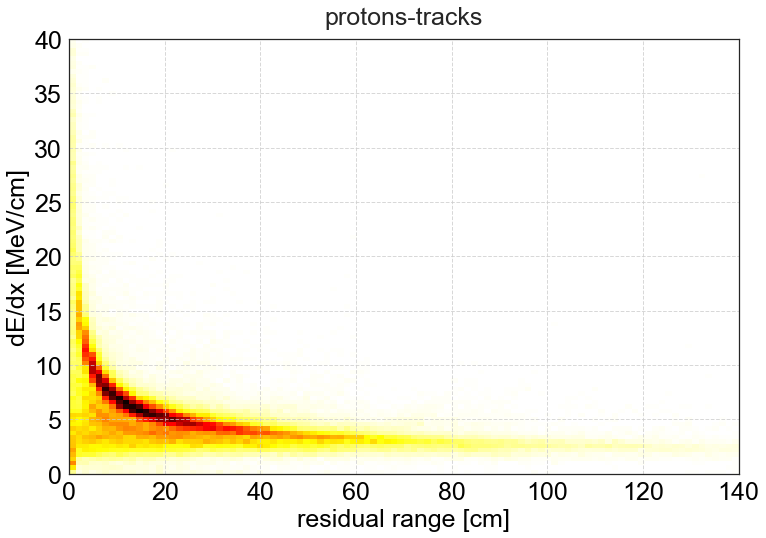

In [12]:
for particles, pname in zip([protons]#,muons,pions]
                            ,['protons','muons',r'$\pi^+$']):
    fig,ax=plt.subplots(figsize=(12,8))
    dEdx_Y = np.concatenate(particles['dEdx_Y'].ravel())
    ResRange_Y = np.concatenate(particles['ResRange_Y'].ravel())
    plot_2d_hist(ResRange_Y,dEdx_Y,bins=(np.linspace(0,140,101),np.linspace(0,40,101)),ax=ax,cmap='hot_r');
    # ax.scatter(ResRange_Y,dEdx_Y,s=1);
    set_axes(ax,r'residual range [cm]',r'dE/dx [MeV/cm]',title=pname+'-tracks',do_add_grid=True)
    plt.savefig(figures_path+pname+'.pdf')

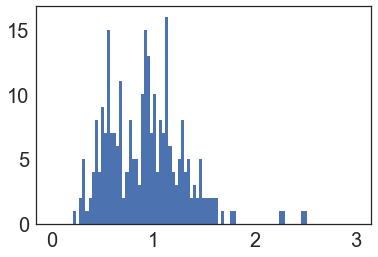

In [5]:
plt.hist(CC1p0pi_Afro_genie_sample['Ev'],bins=np.linspace(0,3,100));